# **1: Install Required Libraries**
Install the necessary Python packages before running the workflow.

In [ ]:
!pip install langgraph
!pip install langchain
!pip install langchain-google-genai
!pip install python-dotenv

# **2: Import Libraries**
Import all the necessary modules and libraries required for this project.

In [2]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph,START, END
from langchain_core.prompts import ChatPromptTemplate
from IPython.display import display, Image
from langchain_core.runnables.graph import MermaidDrawMethod
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
import os
from google.colab import userdata
import google.generativeai as genai

# **Cell 3: Configure the API Key**
Set up the GEMINI API key to use Google's Generative AI models.

In [3]:
# Configure the GEMINI API key
GEMINI_API_KEY = userdata.get("GEMINI_API_KEY")

# Alternatively, load the API key from .env file if not using Google Colab
# load_dotenv()
# GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")

# Configure genai library with the API key
genai.configure(api_key=GEMINI_API_KEY)


# **4: Define the State Class**
Define the State class to store the current state of each workflow process step.

In [80]:
class State(TypedDict):
    query: str
    category: str
    sentiment: str
    response: str


# **5: Define the Node Function**

In [122]:
def categories_query(state: State) -> State:
    prompt = ChatPromptTemplate.from_template(
        "Categorize the following customer query into one of these categories: "
        "Technical, Billing, General, Sales, Returns, Shipping, Account Management. Query: {query}"
    )
    chain = prompt | ChatGoogleGenerativeAI(model="gemini-1.5-flash",
                                            google_api_key=GEMINI_API_KEY)
    category = chain.invoke({"query": state["query"]}).content
    return {"category": category.strip()}

def sentiment_of_query(state: State) -> State:
  prompt = ChatPromptTemplate.from_template(
      "Analyze the sentiment of the following customer query. "
        "Respond with either 'Positive', 'Neutral', or 'Negative'. Query: {query}"
  )
  chain = prompt | ChatGoogleGenerativeAI(model="gemini-1.5-flash",
    google_api_key=GEMINI_API_KEY)
  sentiment = chain.invoke({"query": state["query"]}).content
  return {"sentiment": sentiment}

def technical_query(state: State) -> State:
  prompt = ChatPromptTemplate.from_template(
      "Provide a technical support response to the following query: {query}"
  )
  chain = prompt | ChatGoogleGenerativeAI(model="gemini-1.5-flash",
    google_api_key=GEMINI_API_KEY)
  technical = chain.invoke({"query": state["query"]}).content
  return {"response": technical}


def billing_query(state: State) -> State:
  prompt = ChatPromptTemplate.from_template(
      "Provide a billing support response to the following query: {query}"
  )
  chain = prompt | ChatGoogleGenerativeAI(model="gemini-1.5-flash",
    google_api_key=GEMINI_API_KEY)
  billing = chain.invoke({"query": state["query"]}).content
  return {"response": billing}

def sales_query(state: State) -> State:
  prompt = ChatPromptTemplate.from_template(
      "Provide a sales support response to the following query: {query}"
  )
  chain = prompt | ChatGoogleGenerativeAI(model="gemini-1.5-flash",
    google_api_key=GEMINI_API_KEY)
  sales = chain.invoke({"query": state["query"]}).content
  return {"response": sales}

def returns_query(state: State) -> State:
  prompt = ChatPromptTemplate.from_template(
      "Provide a returns support response to the following query: {query}"
  )
  chain = prompt | ChatGoogleGenerativeAI(model="gemini-1.5-flash",
    google_api_key=GEMINI_API_KEY)
  returns = chain.invoke({"query": state["query"]}).content
  return {"response": returns}

def shipping_query(state: State) -> State:
  prompt = ChatPromptTemplate.from_template(
      "Provide a shipping support response to the following query: {query}"
  )
  chain = prompt | ChatGoogleGenerativeAI(model="gemini-1.5-flash",
    google_api_key=GEMINI_API_KEY)
  shipping = chain.invoke({"query": state["query"]}).content
  return {"response": shipping}

def account_management_query(state: State) -> State:
  prompt = ChatPromptTemplate.from_template(
      "Provide a account_management_query support response to the following query: {query}"
  )
  chain = prompt | ChatGoogleGenerativeAI(model="gemini-1.5-flash",
    google_api_key=GEMINI_API_KEY)
  account_management_query = chain.invoke({"query": state["query"]}).content
  return {"response": account_management_query}



def general_query(state:State) -> State:
  prompt = ChatPromptTemplate.from_template(
      "Provide a general support response to the following query: {query}"
  )
  chain = prompt | ChatGoogleGenerativeAI(model="gemini-1.5-flash",
    google_api_key=GEMINI_API_KEY)
  general = chain.invoke({"query": state["query"]}).content
  return {"response": general}

def escalate_query(state:State) -> State:
    return {"response": "This query has been escalated to a human agent due to its negative sentiment."}



def route_query(state: State) -> str:
    """Route the query based on its sentiment and category."""
    category = state["category"].strip().lower()
    sentiment = state["sentiment"].strip().lower()

    if sentiment == "negative":
        return "Escalate"
    elif category == "technical":
        return "Technical"
    elif category == "billing":
        return "Billing"
    elif category == "sales":
        return "Sales"
    elif category == "returns":
        return "Returns"
    elif category == "shipping":
        return "Shipping"
    elif category == "account management":
        return "AccountManagement"
    else:
        return "General"


# **6: Build the Workflow Graph**
Build the workflow graph using the StateGraph to link the various steps.

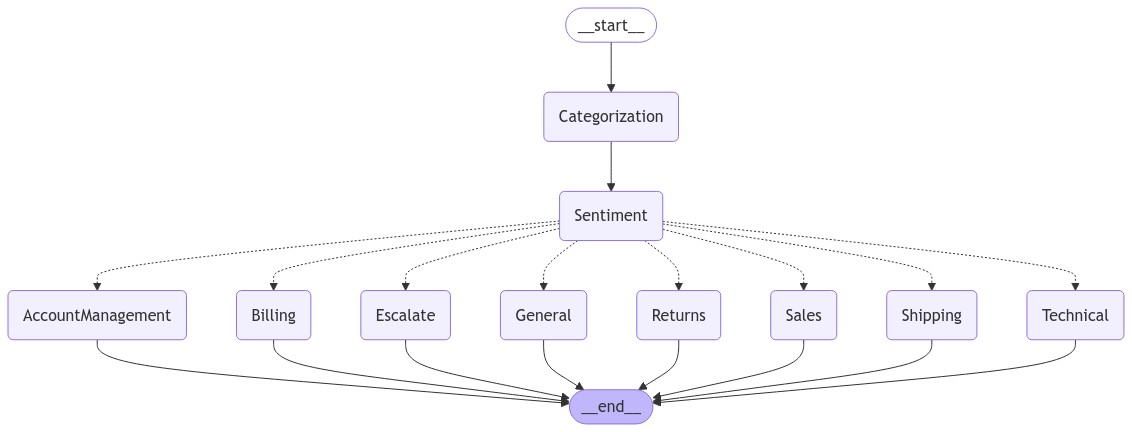

In [124]:
workflow = StateGraph(State)
workflow.add_node("Categorization",categories_query)
workflow.add_node("Sentiment",sentiment_of_query)
workflow.add_node("Technical",technical_query)
workflow.add_node("Billing",billing_query)
workflow.add_node("General",general_query)
workflow.add_node("Escalate",escalate_query)
workflow.add_node("Sales", sales_query)
workflow.add_node("Returns", returns_query)
workflow.add_node("Shipping", shipping_query)
workflow.add_node("AccountManagement", account_management_query)

workflow.add_edge(START,"Categorization")
workflow.add_edge("Categorization","Sentiment")
workflow.add_conditional_edges(
    "Sentiment", route_query,
    {"Technical": "Technical", "Billing": "Billing", "General": "General", "Escalate": "Escalate","Sales":"Sales","Returns":"Returns","Shipping":"Shipping","AccountManagement":"AccountManagement"}
)
workflow.add_edge("Escalate",END)
workflow.add_edge("Technical",END)
workflow.add_edge("Billing",END)
workflow.add_edge("General",END)
workflow.add_edge("Sales", END)
workflow.add_edge("Returns", END)
workflow.add_edge("Shipping", END)
workflow.add_edge("AccountManagement", END)


# **7: Compile and Visualize the Workflow**

In [ ]:
# Compile the graph
app = workflow.compile()
display(Image(app.get_graph().draw_mermaid_png()))

# **8: Define the Function to Run the Agent**

In [125]:
def run_customer_support(query: str) -> Dict[str, str]:
    """Process a customer query through the LangGraph workflow.

    Args:
        query (str): The customer's query

    Returns:
        Dict[str, str]: A dictionary containing the query's category, sentiment, and response
    """
    results = app.invoke({"query": query})
    return {
        "category": results["category"],
        "sentiment": results["sentiment"],
        "response": results["response"]
    }

# **9: Test the Agent with an Example Query**

In [ ]:
query = "the phone i bought is working can i upgrade it"
result = run_customer_support(query)
print(f"Query: {query}")
print(f"Category: {result['category']}")
print(f"Sentiment: {result['sentiment']}")
print(f"Response: {result['response']}")
print("\n")
